# <p style = "font-family:Times New Roman ;text-align:center;font-size:52px">TELCO CUSTOMER CHURN PREDICTION</p>

![Customer Churn](https://www.touchpoint.com/wp-content/uploads/2023/02/5.-Customer-churn-article.png)

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
import plotly.offline as py
import plotly.figure_factory as ff
py.init_notebook_mode(True)

In [2]:
# Importing the dataset

df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv' , index_col = 0)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
print('The number of clients in our database is : ',df.shape[0] , '\nThe number of features in our dataset is : ',df.shape[1])

The number of clients in our database is :  7043 
The number of features in our dataset is :  20


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

We can see that our database countains 20 features about  7043 clients. There is also no missing value within our dataframe
We can also see that variable TotalCharges don't have the correct data type . Let's begin by reformatting it

In [5]:
df = df.copy()
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null 

We

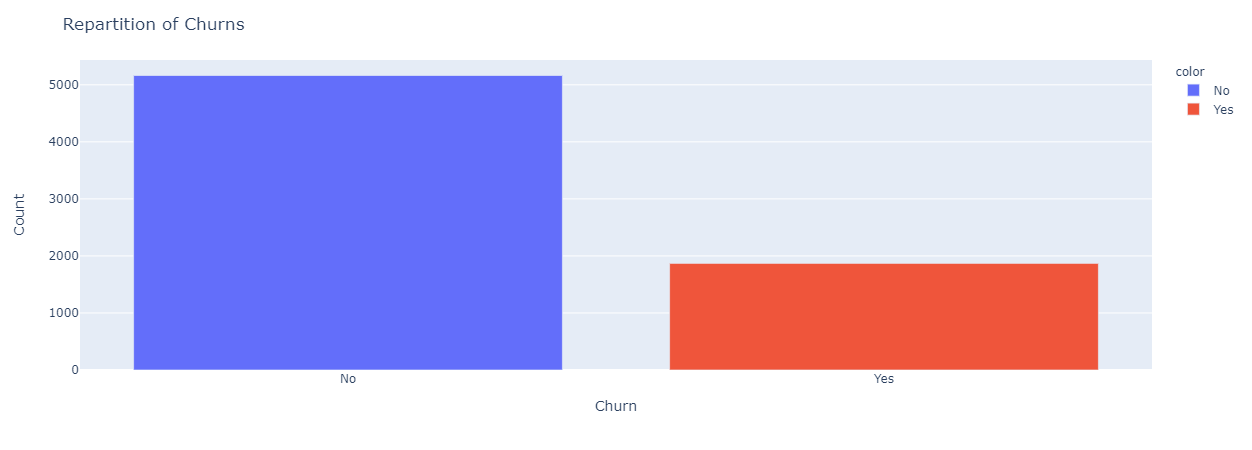

In [6]:
fig = px.bar( x = df['Churn'].value_counts().index ,
        y = df['Churn'].value_counts().values,
        color = df['Churn'].value_counts().index)

fig.update_layout(title_text = 'Repartition of Churns' , xaxis = dict(title = 'Churn') , yaxis = dict(title = 'Count') )
fig.show()

In [7]:
df['Churn'] = pd.get_dummies(df['Churn'],drop_first=True)

# EDA & preprocessing

In [8]:
# Selection of the numerical columns
num_df = df.select_dtypes(include = ['int','float']).drop('SeniorCitizen',axis=1)
num_df.head()

,tenure,MonthlyCharges,TotalCharges
customerID,,,
7590-VHVEG,1,29.85,29.85
5575-GNVDE,34,56.95,1889.50
3668-QPYBK,2,53.85,108.15
7795-CFOCW,45,42.30,1840.75
9237-HQITU,2,70.70,151.65


In [9]:
# Descriptives statistics for numerical variables

num_df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


The mean for the variable TotalCharges is very far from the median , which let us think that most of the individues have a lesser amount of charges . Let's plot the distribution of totalcharges : 

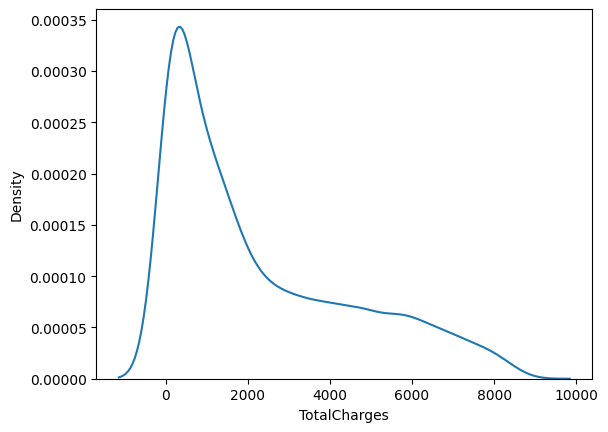

In [10]:
sns.kdeplot(num_df['TotalCharges'])
plt.show()

We can see that the distribution of TotalCharges is Left-skewed which means that most of our customer customer have a Totalcharge lesser than our mean (2283) . this let us think there are outliers in our database .  Let's check for outliers


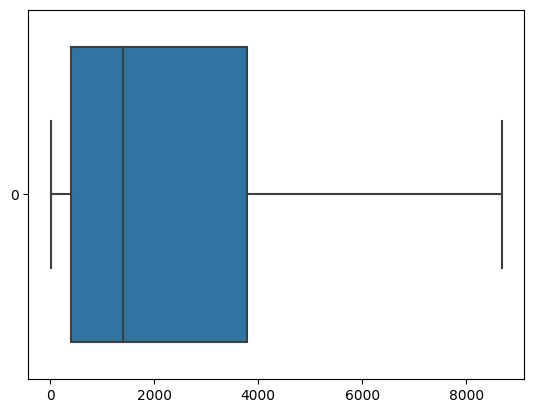

In [11]:
sns.boxplot(df['TotalCharges'] , orient = 'horizontal')
plt.show()

There seems to be no outliers

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight

/tmp/ipykernel_32/3983184841.py:2: UserWarning:

The figure layout has changed to tight



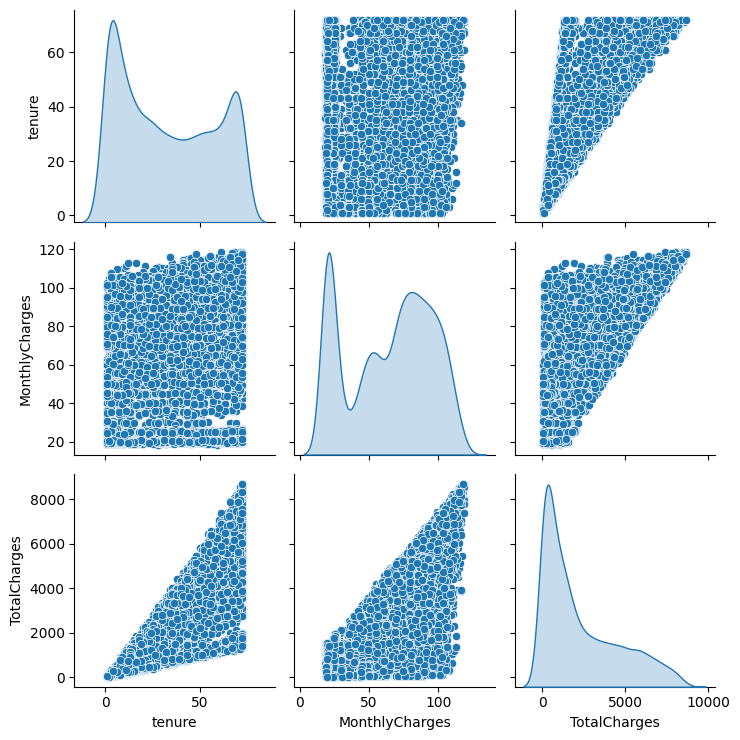

In [12]:
sns.pairplot(num_df, diag_kind = 'kde' )
plt.tight_layout()
plt.show()

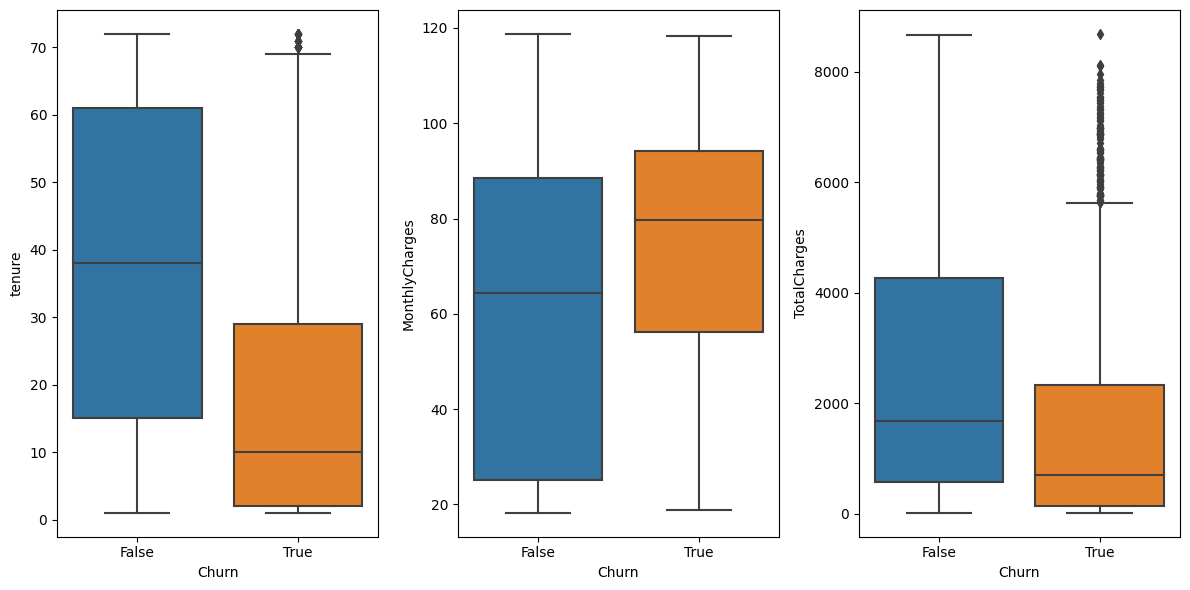

In [13]:
fig,axs = plt.subplots(1,3,figsize=(12,6))
for col in num_df.columns :
    idx = list(num_df.columns).index(col)
    sns.boxplot(data = df , x = 'Churn' , y = col , ax = axs[idx]  )
plt.tight_layout()

In [14]:
cat_df = df.select_dtypes(include = 'O')
cat_df.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
customerID,,,,,,,,,,,,,,,
7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [15]:
cat_df.shape

(7032, 15)

In [16]:
# Descriptives statistics for categorical variables
cat_df.describe(include = 'O')

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365


In [17]:
cat_df.columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [18]:
for column in cat_df.columns:
    print(f'The uniques values in {column} are :', df[column].unique())

The uniques values in gender are : ['Female' 'Male']
The uniques values in Partner are : ['Yes' 'No']
The uniques values in Dependents are : ['No' 'Yes']
The uniques values in PhoneService are : ['No' 'Yes']
The uniques values in MultipleLines are : ['No phone service' 'No' 'Yes']
The uniques values in InternetService are : ['DSL' 'Fiber optic' 'No']
The uniques values in OnlineSecurity are : ['No' 'Yes' 'No internet service']
The uniques values in OnlineBackup are : ['Yes' 'No' 'No internet service']
The uniques values in DeviceProtection are : ['No' 'Yes' 'No internet service']
The uniques values in TechSupport are : ['No' 'Yes' 'No internet service']
The uniques values in StreamingTV are : ['No' 'Yes' 'No internet service']
The uniques values in StreamingMovies are : ['No' 'Yes' 'No internet service']
The uniques values in Contract are : ['Month-to-month' 'One year' 'Two year']
The uniques values in PaperlessBilling are : ['Yes' 'No']
The uniques values in PaymentMethod are : ['Elec

some values have the same meaning like 'no internet service' and no for OnlineSecurity. Let's correct that.

In [19]:
dict1 = {'No internet service': 'No'}
dict2 = {'No phone service': 'No'}

dicts = [dict1 , dict2]

for column in cat_df.columns : 
    for dic in dicts :
        df[column] = df[column].replace(dic)

In [20]:
for column in cat_df.columns:
    print(f'The unique values in {column} are :', df[column].unique())

The unique values in gender are : ['Female' 'Male']
The unique values in Partner are : ['Yes' 'No']
The unique values in Dependents are : ['No' 'Yes']
The unique values in PhoneService are : ['No' 'Yes']
The unique values in MultipleLines are : ['No' 'Yes']
The unique values in InternetService are : ['DSL' 'Fiber optic' 'No']
The unique values in OnlineSecurity are : ['No' 'Yes']
The unique values in OnlineBackup are : ['Yes' 'No']
The unique values in DeviceProtection are : ['No' 'Yes']
The unique values in TechSupport are : ['No' 'Yes']
The unique values in StreamingTV are : ['No' 'Yes']
The unique values in StreamingMovies are : ['No' 'Yes']
The unique values in Contract are : ['Month-to-month' 'One year' 'Two year']
The unique values in PaperlessBilling are : ['Yes' 'No']
The unique values in PaymentMethod are : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [21]:
def plot_histogram(df , x1 =None , x2=None, x3=None , hue = 'Churn'):
    """ Plotting simultaneously 3 histograms  """
    
    fig,axs = plt.subplots(1,3,figsize=(12,6))
    
    cols = df[[x1,x2,x3]].columns
    for col in cols :
        idx = list(cols).index(col)
        sns.histplot(data = df , x = col , hue = hue , ax = axs[idx]  )
    plt.tight_layout()
    plt.show()

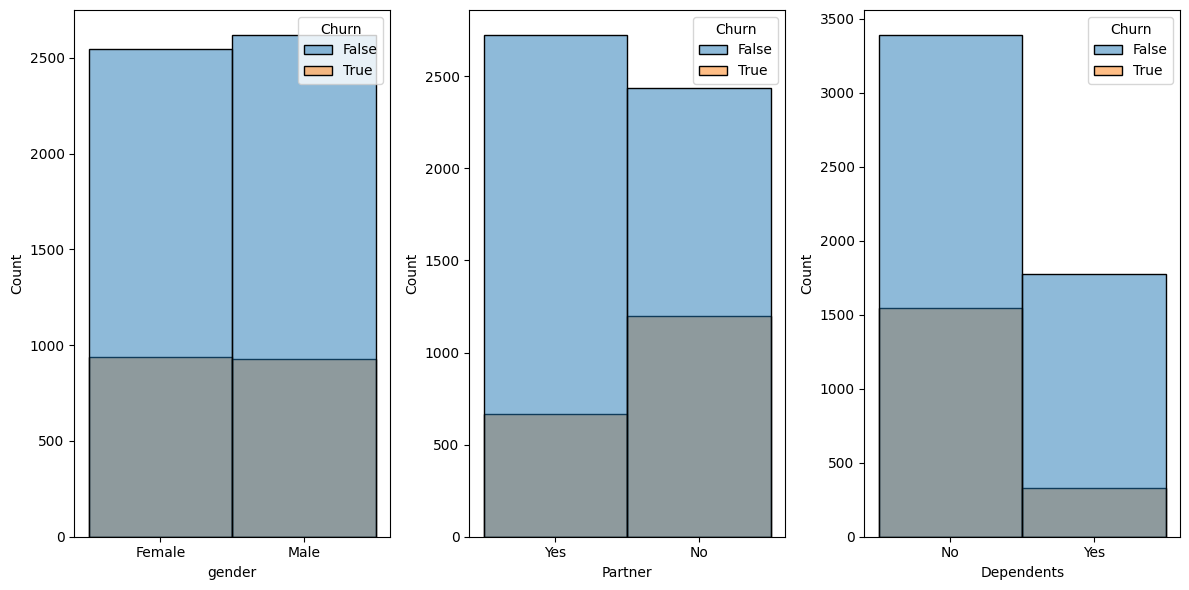

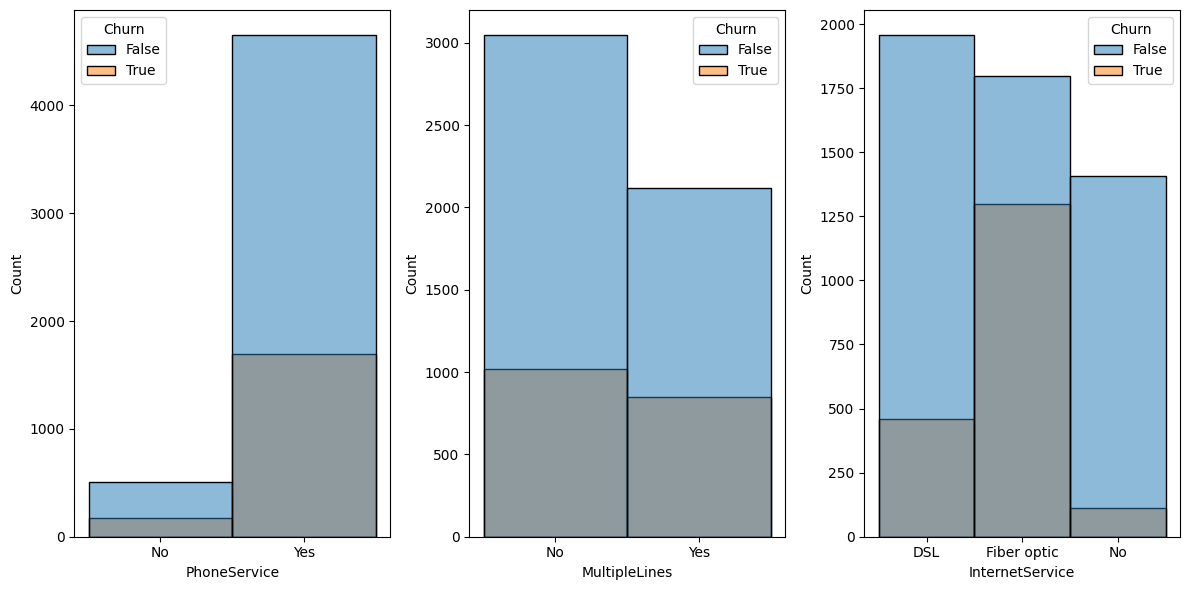

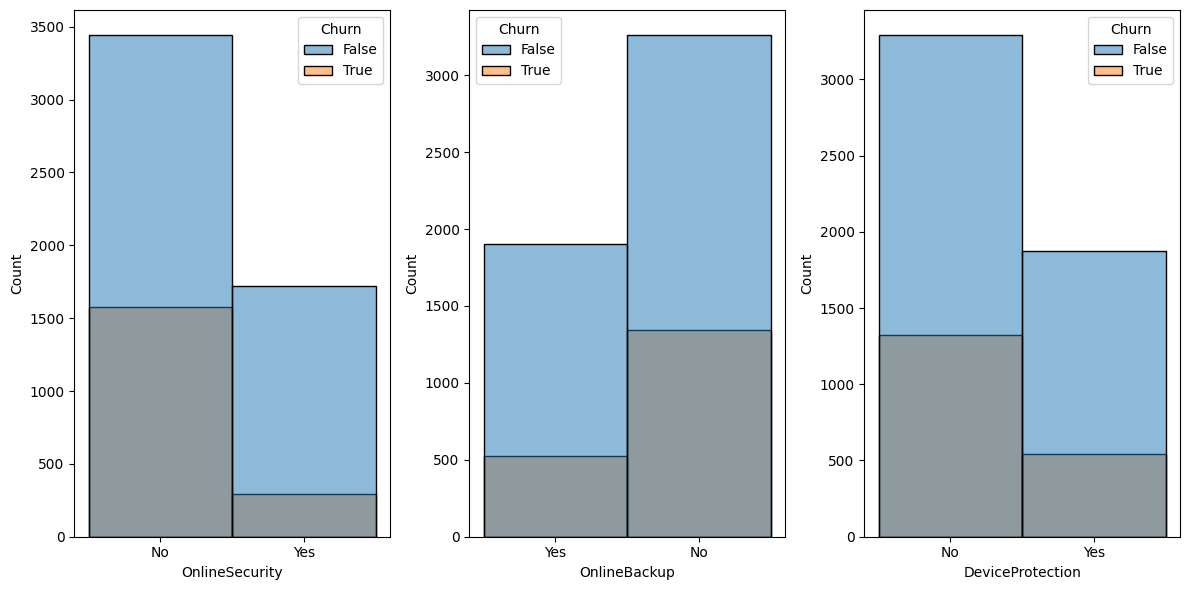

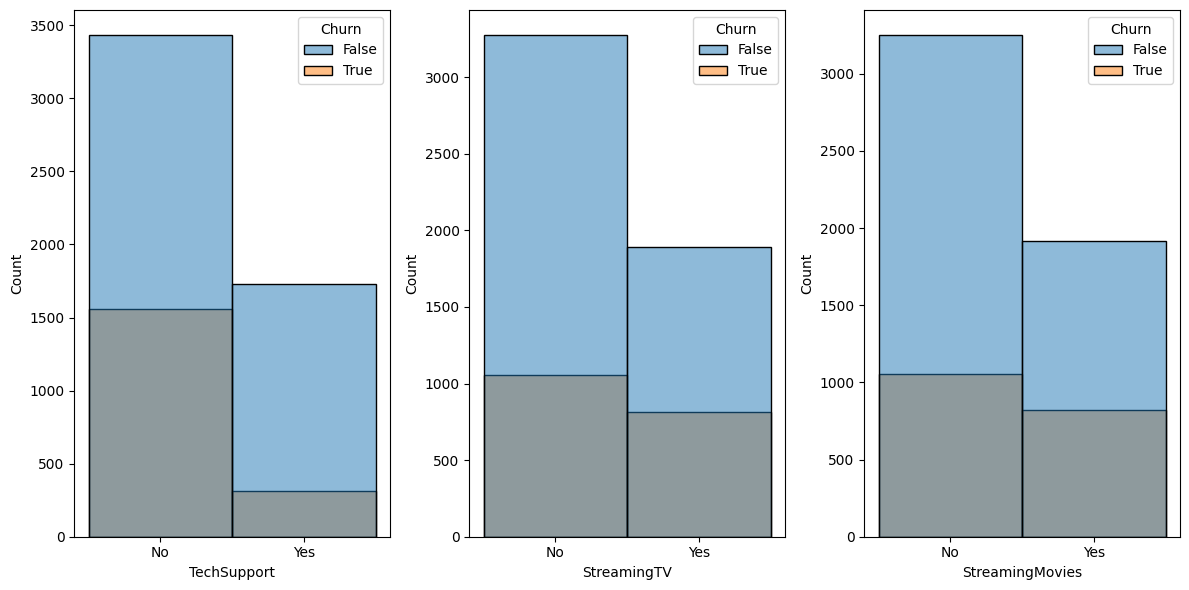

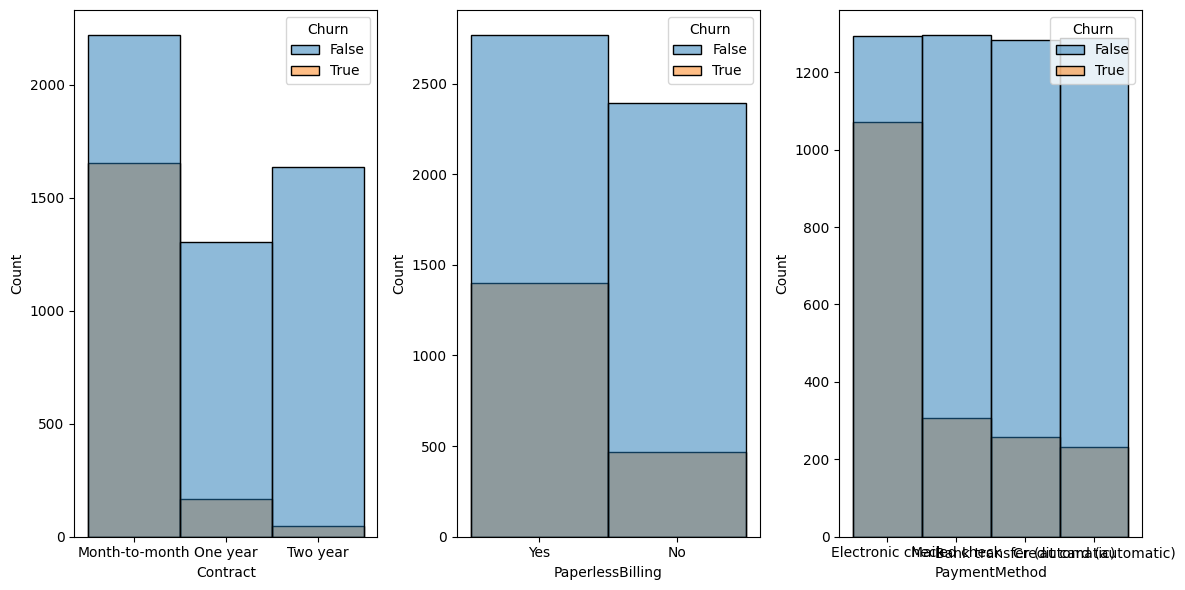

In [22]:
plot_histogram(df = df,
              x1 = 'gender' ,
              x2 = 'Partner',
              x3 = 'Dependents')

plot_histogram(df = df,
              x1 = 'PhoneService',
              x2 =  'MultipleLines',
              x3 = 'InternetService')

plot_histogram(df = df,
              x1 = 'OnlineSecurity', 
              x2 = 'OnlineBackup', 
              x3 = 'DeviceProtection')

plot_histogram(df = df,
              x1 = 'TechSupport',
              x2 =  'StreamingTV', 
              x3 = 'StreamingMovies')

plot_histogram(df = df,
              x1 = 'Contract',
              x2 = 'PaperlessBilling',
              x3 =  'PaymentMethod')


# Modeling

## Calculate Mutual_information 

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning:

Clustering metrics expects discrete values but received continuous values for label, and binary values for target

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning:

Clustering metrics expects discrete values but received continuous values for label, and binary values for target



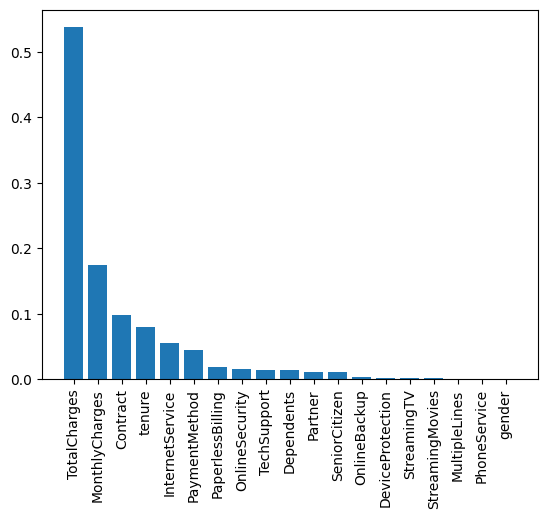

In [23]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mutual_info_score

def get_mi_score(variables):
    return mutual_info_score(variables , df['Churn'])

features_scores = df.drop('Churn',axis = 1).apply(get_mi_score).sort_values(ascending = False)

# visualize feature importance
plt.bar( x= features_scores.index ,height = features_scores.values)
plt.xticks(rotation = 90)
plt.show()

In [24]:
features_scores

TotalCharges        0.537530
MonthlyCharges      0.173835
Contract            0.098182
tenure              0.078950
InternetService     0.055394
PaymentMethod       0.044423
PaperlessBilling    0.019119
OnlineSecurity      0.015891
TechSupport         0.014614
Dependents          0.014270
Partner             0.011383
SeniorCitizen       0.010533
OnlineBackup        0.003464
DeviceProtection    0.002230
StreamingTV         0.001983
StreamingMovies     0.001837
MultipleLines       0.000798
PhoneService        0.000069
gender              0.000037
dtype: float64

## Modelisation

In [25]:
# Encoding our categorical data
cat_cols_endoded = pd.get_dummies(cat_df , drop_first = True)
df_encoded = df.drop(cat_df.columns , axis = 1)
df_encoded = pd.concat([df_encoded,cat_cols_endoded] , axis = 1)
df_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,1,29.85,29.85,False,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
5575-GNVDE,0,34,56.95,1889.50,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
3668-QPYBK,0,2,53.85,108.15,True,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
7795-CFOCW,0,45,42.30,1840.75,False,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
9237-HQITU,0,2,70.70,151.65,True,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


In [26]:
# Divide our data for final_test

X = df_encoded.drop('Churn' , axis = 1)
y = df_encoded[['Churn']]

from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,
                                                      stratify = y ,
                                                      random_state = 42 ,
                                                      test_size = 0.2)

In [27]:
y_test.shape

(1407, 1)

In [28]:
print('The shape of our training dataset is :' , X_train.shape)
print('The shape of our testing dataset is :' , X_test.shape)

The shape of our training dataset is : (5625, 30)
The shape of our testing dataset is : (1407, 30)


In [29]:
# Let's scale our data

from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()

num_cols = num_df.columns
scaler.fit(X_train[num_cols])
X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer

from sklearn.model_selection import cross_validate

from sklearn.metrics import confusion_matrix , accuracy_score , f1_score , roc_auc_score

import warnings
warnings.simplefilter('ignore')

In [31]:
# numerical_transformer = Pipeline(steps = [('scaler',StandardScaler())])
# categorical_transformer = Pipeline(steps = [('onehot',OneHotEncoder())])

# cat_transformer = Pipeline(steps = [('label',LabelEncoder())])

# transformer = ColumnTransformer(transformers = [('num',numerical_transformer , num_df.columns),
#                                                ('cat',categorical_transformer , cat_df.columns)])

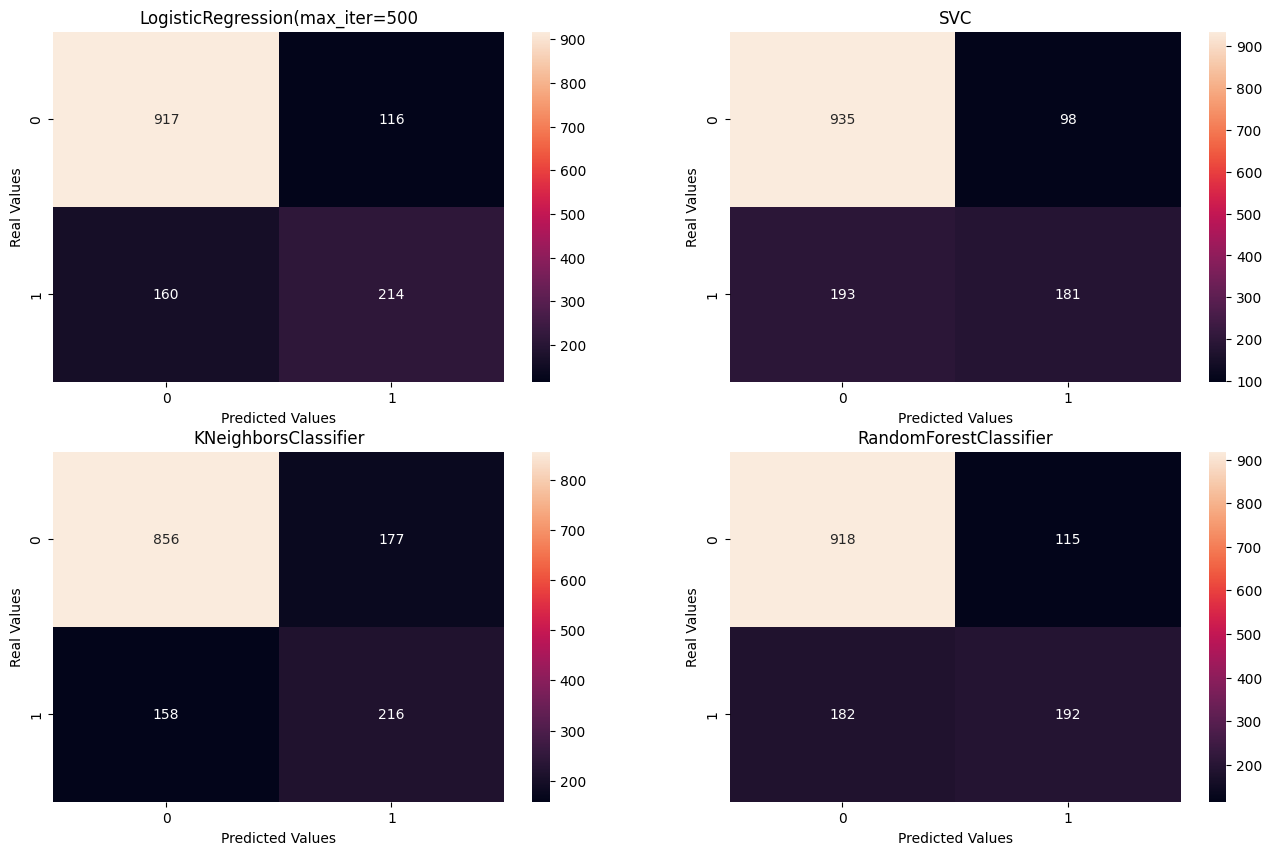

In [32]:
lr = LogisticRegression(max_iter = 5000)
svc = SVC()
knn = KNeighborsClassifier()
rf = RandomForestClassifier()
results = pd.DataFrame()
models = [lr,svc,knn,rf]

fig , axs = plt.subplots(2,2,figsize = (16,10))
for model in models :
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    results_model = pd.DataFrame({'accuracy':accuracy_score(y_pred,y_test),
                                 'f1_score':f1_score(y_pred,y_test),
                                  'roc_auc':roc_auc_score(y_pred,y_test)} , index = [str(model)[:-2]])
    results = pd.concat([results , results_model] , axis = 0)
    
    
#     plt.figure(figsize = (12,6))
    idx = models.index(model)
    cfx = confusion_matrix(y_test , y_pred)
    sns.heatmap( cfx , annot = True , fmt = 'g' , ax = axs.flat[idx])
    axs.flat[idx].set_xlabel('Predicted Values')
    axs.flat[idx].set_ylabel('Real Values')
    axs.flat[idx].set_title(str(model)[:-2])
    

In [33]:
results

,accuracy,f1_score,roc_auc
LogisticRegression(max_iter=500,0.803838,0.607955,0.749962
SVC,0.793177,0.554364,0.738823
KNeighborsClassifier,0.761905,0.563233,0.696900
RandomForestClassifier,0.788913,0.563877,0.729976


In [34]:
# 5-fold cross-validation

model_lr = cross_validate(LogisticRegression(),X , y , cv = 5 ,scoring = ['accuracy','f1' ,'roc_auc'])
model_svc = cross_validate(SVC(),X , y , cv = 5 ,scoring = ['accuracy','f1' ,'roc_auc'] )
model_knn = cross_validate(KNeighborsClassifier(),X , y, cv = 5,scoring = ['accuracy','f1' ,'roc_auc'] )
model_rf = cross_validate(RandomForestClassifier(),X , y , cv = 5 ,scoring = ['accuracy','f1' ,'roc_auc'] )

models_cv = [model_lr , model_knn , model_svc , model_rf]

In [35]:
 print('======= accuracies ======')
for model in models_cv :
    print(model['test_accuracy'].mean())
    
    
print('======= f1_scores ======')
for model in models_cv :
    print(model['test_f1'].mean())

======= accuracies ======
0.8036114893931077
0.7610921211863867
0.7342150252598014
0.7881093415264664
======= f1_scores ======
0.5934861553448545
0.49721101061950684
0.0
0.5443587396780507


Our models have a good accuracy but a f1-score low meaning they can't predict well the target. Let's try to improve it using other techniques

In [36]:
# Voting Classifier

## Voting Hard
from sklearn.ensemble import VotingClassifier

voting_hard = VotingClassifier(estimators = [('Logistic Regression', lr),
                                             ('Random Forest', rf),
                                            ('SVC',svc)] , voting = 'hard')

voting_hard.fit(X_train,y_train)

VotingClassifier(estimators=[('Logistic Regression',
                              LogisticRegression(max_iter=5000)),
                             ('Random Forest', RandomForestClassifier()),
                             ('SVC', SVC())])

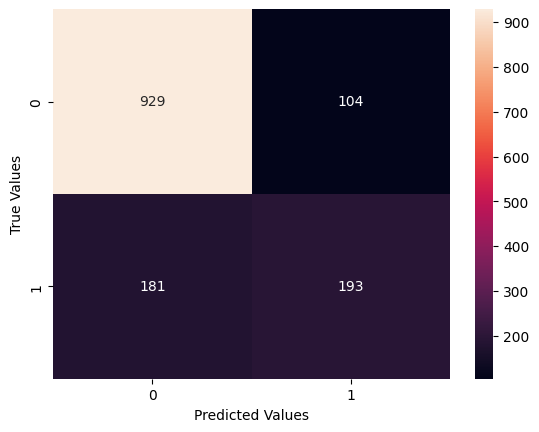

             accuracy  f1_score   roc_auc
Voting_hard  0.797441  0.575261  0.743384


In [37]:
y_pred_hard = voting_hard.predict(X_test)

results_model = pd.DataFrame({'accuracy':accuracy_score(y_pred_hard,y_test),
                                 'f1_score':f1_score(y_pred_hard,y_test),
                                  'roc_auc':roc_auc_score(y_pred_hard,y_test)} , index = ['Voting_hard'])
results_model.head()

cfx = confusion_matrix(y_test , y_pred_hard)
sns.heatmap( cfx , annot = True , fmt = 'g')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

print(results_model.head())

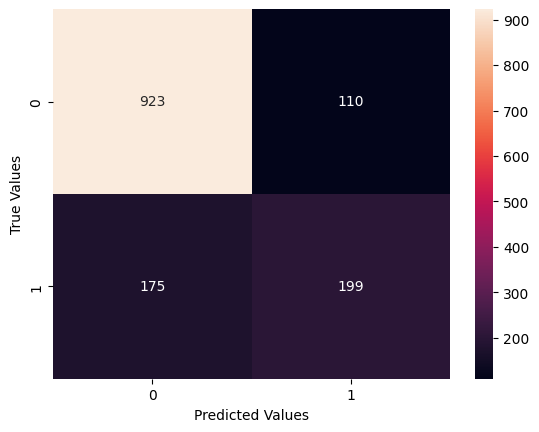

             accuracy  f1_score   roc_auc
Voting_hard  0.797441  0.582723  0.742316


In [38]:
## Voting Soft
from sklearn.ensemble import VotingClassifier

voting_soft = VotingClassifier(estimators = [('Logistic Regression', lr),
                                             ('Random Forest', rf),
                                            ] , voting = 'soft')

voting_soft.fit(X_train,y_train)

y_pred_hard = voting_soft.predict(X_test)

results_model = pd.DataFrame({'accuracy':accuracy_score(y_pred_hard,y_test),
                                 'f1_score':f1_score(y_pred_hard,y_test),
                                  'roc_auc':roc_auc_score(y_pred_hard,y_test)} , index = ['Voting_hard'])
results_model.head()

cfx = confusion_matrix(y_test , y_pred_hard)
sns.heatmap( cfx , annot = True , fmt = 'g')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

print(results_model.head())

# Feature Engineering

Our model are not able to capture all the information in our data . Let's try some feature engineering to  improve our model

## Let's try to include the result of a k-means to see if it improves our model

In [39]:
from sklearn.cluster import KMeans

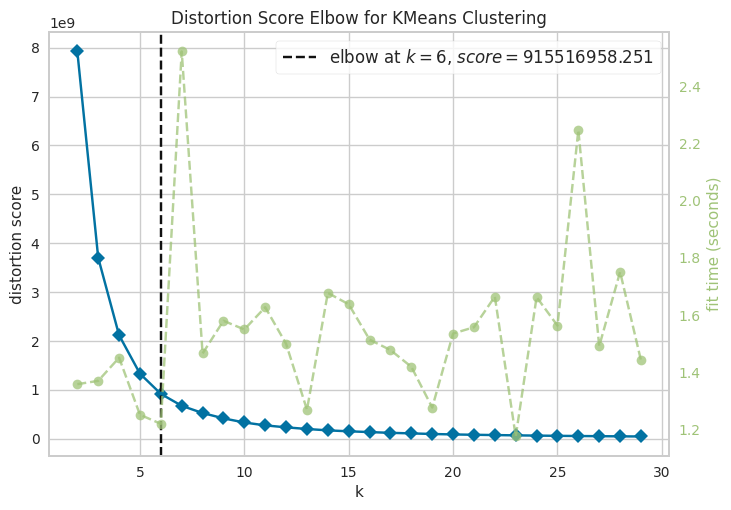

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [40]:
# Let's use the Elbow method to decide how much cluster we need

from yellowbrick.cluster import KElbowVisualizer
model = KMeans()

visualizer = KElbowVisualizer(model , k = (2,30) , timings = True)
visualizer.fit(df_encoded)
visualizer.show()

In [41]:
kmeans = KMeans(n_clusters = 6)
kmeans.fit(df_encoded)
df_encoded['Clusters'] = kmeans.fit_predict(df_encoded)

In [42]:
df_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Clusters
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,1,29.85,29.85,False,False,True,False,False,True,...,False,False,False,False,False,True,False,True,False,0
5575-GNVDE,0,34,56.95,1889.50,False,True,False,False,True,False,...,False,False,False,True,False,False,False,False,True,5
3668-QPYBK,0,2,53.85,108.15,True,True,False,False,True,False,...,False,False,False,False,False,True,False,False,True,0
7795-CFOCW,0,45,42.30,1840.75,False,True,False,False,False,True,...,False,False,False,True,False,False,False,False,False,5
9237-HQITU,0,2,70.70,151.65,True,False,False,False,True,False,...,False,False,False,False,False,True,False,True,False,0


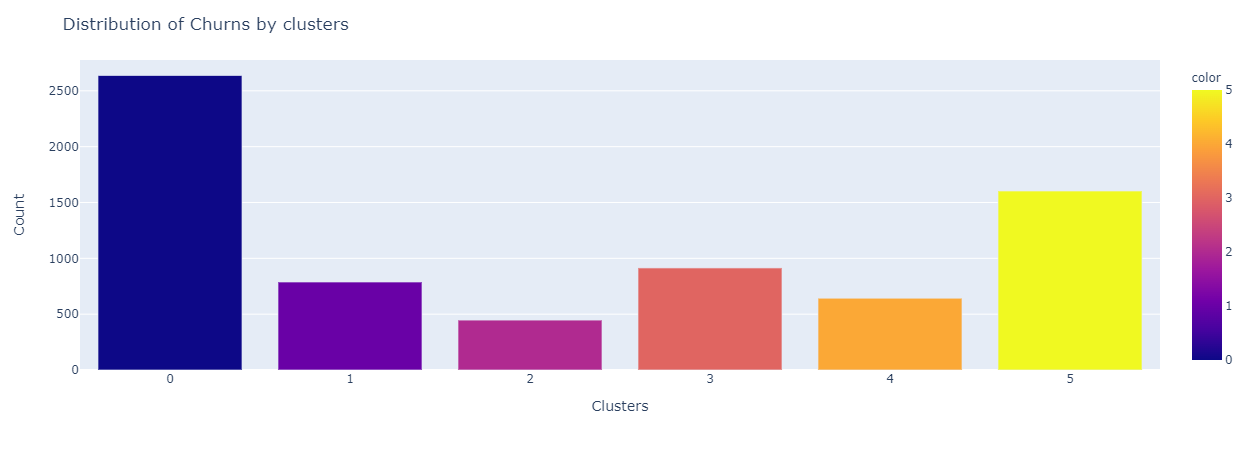

In [43]:
fig = px.bar( x = df_encoded['Clusters'].value_counts().index ,
        y = df_encoded['Clusters'].value_counts().values,
        color = df_encoded['Clusters'].value_counts().index)

fig.update_layout(title_text = 'Distribution of Churns by clusters' , xaxis = dict(title = 'Clusters') , yaxis = dict(title = 'Count') )
fig.show()

In [44]:
# Let's create a function to benchmark our model

def modelisation(X_train_df , X_test_df , y_train_df , y_test_df):
    
    # fit the data
    model = LogisticRegression(max_iter = 5000)
    model.fit(X_train_df , y_train_df)
    y_pred = model.predict(X_test_df)
    
    # Show the confusion matrix
    cfx = confusion_matrix(y_test_df ,y_pred)
    sns.heatmap(cfx , annot = True , fmt = 'g')
    
    # Record the metrics
    
    results = pd.DataFrame({'accuracy':accuracy_score(y_pred,y_test_df), 'f1_score':f1_score(y_pred,y_test_df)} , index = ['LogisticRegression'])
    print(results.head())
    
    return  model ,results 

                    accuracy  f1_score
LogisticRegression  0.803838  0.607955


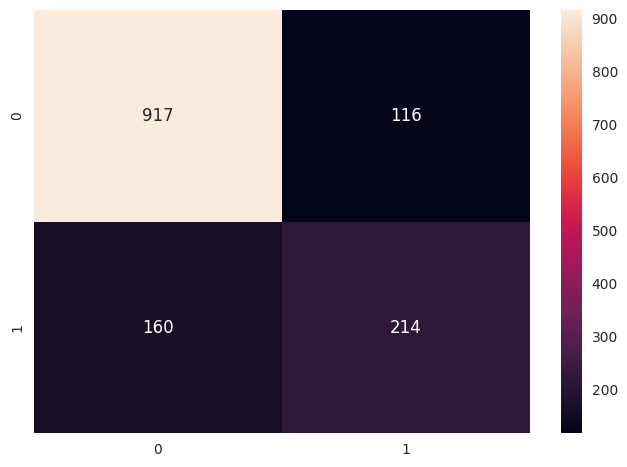

In [45]:
_ ,results = modelisation(X_train , X_test, y_train ,  y_test)

It don't seems to improve our score significantly

## ACP

## Let's try to include a combination of variable by including principal components

In [98]:
# Selecting the numerical variables to perform the ACP
num_train = X_train.select_dtypes(include = ['int','float']).drop('SeniorCitizen',axis=1)
num_test = X_test.select_dtypes(include = ['int','float']).drop('SeniorCitizen',axis=1)
num_train.head()

,tenure,MonthlyCharges,TotalCharges
customerID,,,
1830-GGFNM,1.321816,0.981556,1.659900
4501-VCPFK,-0.267410,-0.971546,-0.562252
8871-JLMHM,1.444064,0.837066,1.756104
0225-ZORZP,-1.204646,0.641092,-0.908326
1530-ZTDOZ,0.669826,-0.808787,-0.101561


In [68]:
# Fitting
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(num_train.dropna())

PCA()

In [69]:
pca.explained_variance_ratio_.cumsum()

array([0.72789913, 0.98033271, 1.        ])

In [70]:
pca.components_

array([[ 0.56728773,  0.48636719,  0.66455368],
       [ 0.60694213, -0.79234094,  0.06178254],
       [ 0.55660209,  0.36829715, -0.74468203]])

In [100]:
# Obtening the transformed data
num_train_pca = pca.transform(num_train)
num_test_pca = pca.transform(num_test)

# Reformationg the results of the pca
num_train_pca = pd.DataFrame(num_train_pca , columns = ['pc1','pc2','pc3'] ,index = num_train.index)
num_test_pca = pd.DataFrame(num_test_pca , columns = ['pc1','pc2','pc3'] ,index = num_test.index)

In [101]:
# Merging the pca result with our other features

X_train_pca = X_train.copy()
X_train_pca = pd.concat([X_train_pca ,num_train_pca],axis=1)

X_test_pca = X_test.copy()
X_test_pca = pd.concat([X_test_pca ,num_test_pca],axis=1)

In [102]:
X_train_pca.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,pc1,pc2,pc3
customerID,,,,,,,,,,,,,,,,,,,,,
1830-GGFNM,0,1.321816,0.981556,1.659900,True,True,True,True,False,True,...,False,False,True,False,True,False,False,2.330340,0.127092,-0.138868
4501-VCPFK,0,-0.267410,-0.971546,-0.562252,True,False,False,False,True,False,...,False,False,False,False,False,True,False,-0.997873,0.572755,-0.087959
8871-JLMHM,0,1.444064,0.837066,1.756104,False,True,False,True,False,True,...,False,False,True,False,True,False,False,2.393347,0.321718,-0.195681
0225-ZORZP,0,-1.204646,0.641092,-0.908326,True,False,False,True,False,False,...,True,False,False,False,False,True,False,-0.975206,-1.295233,0.242017
1530-ZTDOZ,0,0.669826,-0.808787,-0.101561,False,True,False,False,True,False,...,False,False,False,False,False,False,False,-0.080876,1.041106,0.150583


                    accuracy  f1_score
LogisticRegression  0.804549  0.609929


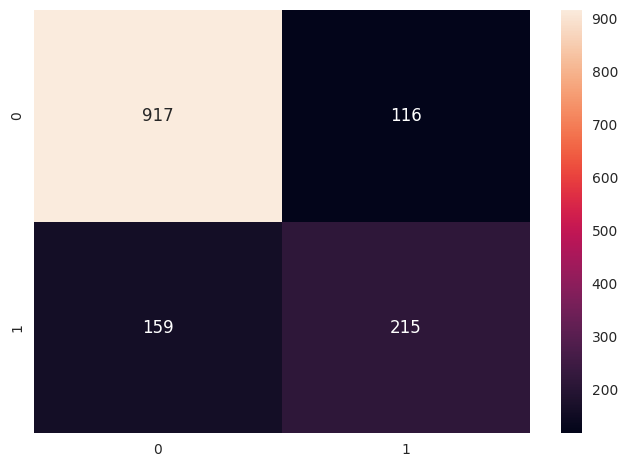

In [103]:
_ , results = modelisation(X_train_pca , X_test_pca , y_train , y_test)

It barely improves  our f1-score

# Let's try to improve the f1-score 

When working on imbalanced datasets the metric we should focus on is generally

## Undersampling

## Cutting

In [131]:
count_class0 , count_class1 = y_train.Churn.value_counts()

print('The count of the majority observations is :' , count_class0 )
print('The count of the minority observations is :', count_class1)

The count of the majority observations is : 4130
The count of the minority observations is : 1495


In [136]:
# Separating the training dataset by value of the target
y_train_class0 = y_train[y_train['Churn'] == 0]
X_train_class0 = X_train.loc[y_train_class0.index]

y_train_class1 = y_train[y_train['Churn'] == 1]
X_train_class1 = X_train.loc[y_train_class1.index]

In [137]:
# Undersampling the target=0 (non churn) training dataset

X_train_class0_us = X_train_class0.sample(count_class1)
y_train_class0_us = y_train_class0.sample(count_class1)

print('The shape of the majority dataframe is :' ,X_train_class0_us.shape)
print('The shape of the minority dataframe is :', X_train_class1.shape)

The shape of the majority dataframe is : (1495, 30)
The shape of the minority dataframe is : (1495, 30)


In [138]:
# Refusing together the targets dataset
X_train_us = pd.concat([X_train_class0_us , X_train_class1] , axis = 0)
y_train_us = pd.concat([y_train_class0_us , y_train_class1 ] , axis = 0)

                    accuracy  f1_score
LogisticRegression  0.724236  0.607287


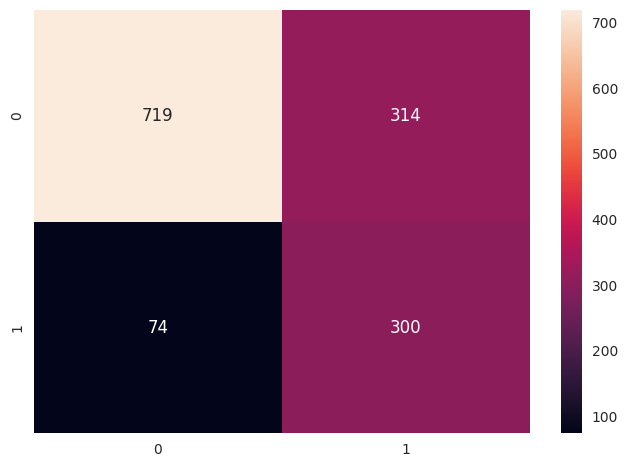

In [139]:
_ , results = modelisation(X_train_us , X_test , y_train_us , y_test )

## Oversampling

### Random Sampling

In [141]:
# Oversampling the target=0 (non churn) training dataset

X_train_class1_os = X_train_class1.sample(count_class0 ,replace = True)
y_train_class1_os = y_train_class1.sample(count_class0 ,replace = True)

print('The shape of the majority dataframe is :' ,X_train_class1_os.shape)
print('The shape of the minority dataframe is :', X_train_class1_os.shape)

The shape of the majority dataframe is : (4130, 30)
The shape of the minority dataframe is : (4130, 30)


In [142]:
# Refusing together the targets dataset

X_train_os = pd.concat([X_train_class0 , X_train_class1_os] , axis = 0)
y_train_os = pd.concat([y_train_class0 , y_train_class1_os ] , axis = 0)

                    accuracy  f1_score
LogisticRegression  0.725657   0.60124


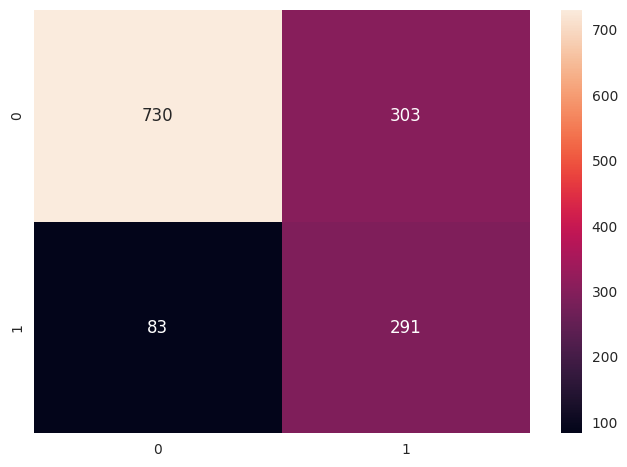

In [143]:
_ , results = modelisation(X_train_os , X_test ,y_train_os , y_test )

### SMOTE

In [61]:
from imblearn.over_sampling import SMOTE

In [62]:
smote = SMOTE(sampling_strategy = 'minority')
X_train_smote , y_train_smote = smote.fit_resample(X_train,y_train)

                    accuracy  f1_score
LogisticRegression   0.74769  0.607735


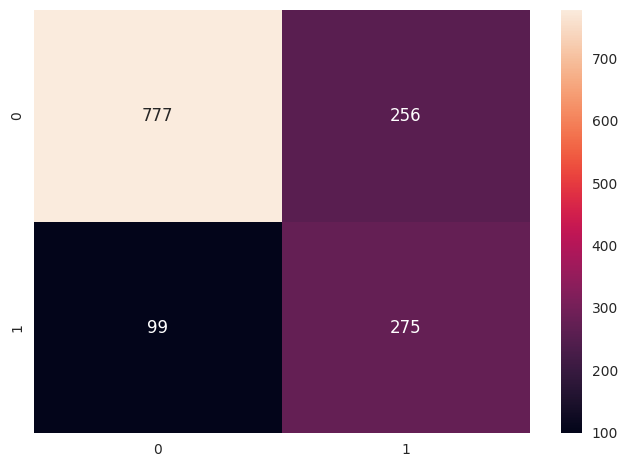

In [63]:
model_smote , results = modelisation(X_train_smote , X_test , y_train_smote , y_test )

In [64]:
# feature importance for our prediction
model_smote.coef_

array([[-0.13858005, -1.64049908, -8.07420377,  0.82897674,  0.18049637,
         0.13387481, -0.32958142,  2.74347507, -1.84847855,  1.79428484,
         7.46744509, -1.0265398 , -1.0265398 ,  0.87806472, -1.0265398 ,
         1.17471584, -1.0265398 ,  1.368914  , -1.0265398 ,  0.9326156 ,
        -1.0265398 ,  2.85514105, -1.0265398 ,  2.85185188, -0.63398295,
        -1.27423025,  0.55313242,  0.44452738,  0.91721554,  0.55884848]])

The model perform a lot better on our target but also make more error on the 

# Conclusion

In this notebook , we made an analysis to model the customer churn at the Telco company . To model this relationship we used five classifiers : the logistic regression , the sector vector machine , the k nearest neighbors and the random forest

Key takeways are :
 * The churn rate in our database is 26.52 %
 * The features having the greater impact on churn are the TotalCharges , the MontlyCharges and the Contract
 * Among the models tested the Logistic regression was the one who performed better with an accuracy of 80,3% and a f1_score of  59,3 % making it the more robust of the tested algorithms

#